# Actividad Asíncrona IA

## Capítulo 3, Capítulo 4 y Capítulo 5

### Resolución de problemas

___

In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 10.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Ejercicio 1. Cap 3 - Un array de Numpy
#### Seleccione la opción correcta y justifique su respuesta.

  a. Crece dinámicamente cuando se genera; permite arreglos de distintos tamaños y tipos.  
  
  b. Tiene un tamaño fijo cuando se genera, todos los elementos tienen datos de tipo homogéneo y mantienen el mismo tamaño en memoria.

  c. Crece dinámicamente cuando se genera y todos los elementos tienen datos de tipo homogéneo.  

  d. Tiene un tamaño fijo cuando se genera; permite arreglos de distintos tamaños y tipos.



Respuesta correcta: **b**

Los arrays tienen un tamaño fijo cuando se generan, un cambio en el tamaño se crea un nuevo array y elimina el original, además todos sus elementos mantienen un mismo tipo de datos.

___

## Ejercicio 2. Cap 3 - ¿Qué característica se obtiene de la siguiente ejecución: *df.A.corr(df.B)*?
#### Seleccione la opción correcta y justifique su respuesta.
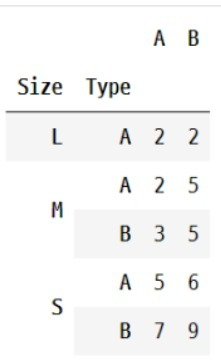

a.	Matriz de correlación tomando las variables numéricas por pares de ‘A’ y ‘B’.

b.	Correlaciones entre 'A' y las demás variables numéricas.´

c.	Correlación entre la columna 'A' y la columna 'B'.

d.	Estadísticas descriptivas de las columnas (variables).



Respuesta correcta: **c**


Al usar el método **corr()** se obtiene un único valor numérico entre -1 y 1, estos valores indican la fuerza y dirección lineal entre las columnas **A** y **B**

___

## Ejercicio 1. Cap 4 - Carga de datos sintéticos
**Descripción:** Genere un conjunto de datos que simule la **duración (minutos)** de llamadas al soporte técnico.  
**Supuesto razonable:** variable positiva, asimétrica (p. ej., distribución *Gamma* o *Lognormal*).

**Tareas**
1. Genere `n=500` observaciones con parámetros que considere razonables.
2. Guarde el resultado en un `DataFrame` con la columna `duracion_min`.
3. Muestre `head()` y un resumen con `describe()`.

> **Tip:** `stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(n)`

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Defina el tamaño de la muestra (n)
n = 500

# 2. Asigne los parámetros mu y sigma de la distribución lognormal
mu = 2.0
sigma = 0.5

# 3. Genere los datos aleatorios
data = stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(size=n)

# 4. Cree un DataFrame llamado df con una columna 'duracion_min'
df = pd.DataFrame({'duracion_min': data})
# 5. Muestre las primeras filas y el resumen estadístico
print(df.head())
print("\nResumen estadístico:")
print(df.describe())

   duracion_min
0      6.800807
1      6.719658
2      8.609404
3      8.147964
4      3.206933

Resumen estadístico:
       duracion_min
count    500.000000
mean       8.066408
std        4.051454
min        1.519092
25%        5.245617
50%        7.341016
75%        9.801780
max       31.866595


## Ejercicio 2. Cap 4 - Función de densidad teórica vs datos
1. Ajuste una distribución **Lognormal** a los datos mediante máxima verosimilitud.
2. Sobreponga su **densidad** al histograma normalizado.
3. Reporte los parámetros estimados.

> **Tip:** `s, loc, scale = stats.lognorm.fit(df['duracion_min'], floc=0)`

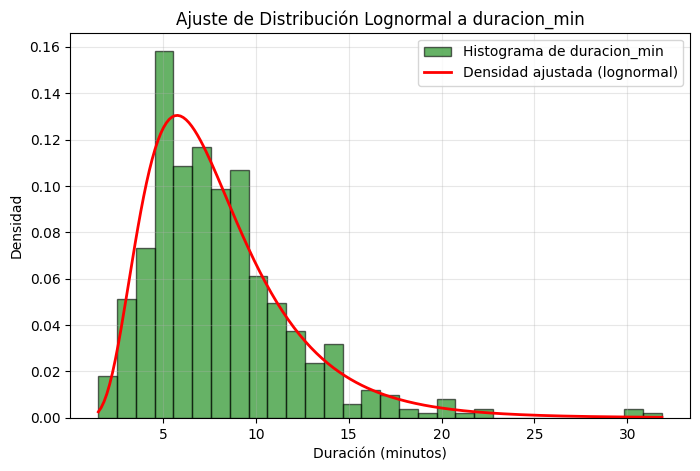

In [2]:
# 1. Ajuste los parámetros de la distribución lognormal con stats.lognorm.fit
s, loc, scale = stats.lognorm.fit(df['duracion_min'], floc=0)

# 2. Genere un rango de valores (x) para la curva de densidad
x = np.linspace(df['duracion_min'].min(), df['duracion_min'].max(), 200)

# 3. Calcule la función de densidad teórica (pdf)
pdf = stats.lognorm.pdf(x, s=s, loc=loc, scale=scale)

# 4. Grafique el histograma y la curva de densidad ajustada
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['duracion_min'], bins=30, density=True, alpha=0.6, color='g', edgecolor='black', 
        label='Histograma de duracion_min')
plt.plot(x, pdf, 'r-', lw=2, label='Densidad ajustada (lognormal)')
# 5. Incluya etiquetas, título y leyenda
plt.title('Ajuste de Distribución Lognormal a duracion_min')
plt.xlabel('Duración (minutos)')
plt.legend()
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Ejercicio 1. Cap 5 - Aplicación del Modelo de Aprendizaje Supervisado para Predicción Numérica

### Actividad 2: Regresión Lineal
2.1 Implementa un modelo de regresión lineal para predecir una variable numérica.

2.2 Entrena el modelo con un conjunto de datos y evalúa su rendimiento.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Número de incidencias y duración de llamadas
np.random.seed(42)
n = 200
incidencias = np.random.randint(1, 10, size=n)
duracion = 5 + 2.5 * incidencias + np.random.normal(0, 2, size=n)

df = pd.DataFrame({'incidencias': incidencias, 'duracion_min': duracion})

print(df.head())

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['incidencias']]
y = df['duracion_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nError cuadrático medio: {mse}")
print(f"R^2: {r2}")

   incidencias  duracion_min
0            7     21.723471
1            4     13.228975
2            8     24.286510
3            5     18.612244
4            7     24.587721

Error cuadrático medio: 3.965255210361414
R^2: 0.9200643133611142


## Ejercicio 2. Cap 5 - Aplicación del Modelo de Aprendizaje Supervisado para Clasificación

### Actividad 3: Clasificación con Regresión Logística
3.1 Utiliza el algoritmo de regresión logística para clasificar datos en dos categorías.

3.2 Evalúa la precisión y otras métricas del modelo.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Clasificar las llamadas en 'Cortas (0)', 'Largas (1)'
umbral = df['duracion_min'].median()
df['clase'] = np.where(df['duracion_min'] > umbral, 1, 0) # 1: Largas, 0: Cortas

df.head()

,incidencias,duracion_min,clase
0,7,21.723471,1
1,4,13.228975,0
2,8,24.286510,1
3,5,18.612244,1
4,7,24.587721,1


In [9]:
# Preparar los datos para la clasificación
np.random.seed(42)
df['incidencias'] = np.random.randint(1, 10, len(df))

x = df[['incidencias']] # Característica independiente
y = df['clase'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.2,
    random_state=42
)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"Precisión del modelo: {accuracy_score(y_test, y_pred)*100:.2f}%")

Matriz de confusión:
[[22  0]
 [ 2 16]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40

Precisión del modelo: 95.00%


___

# Fin